In [185]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [186]:
# read the data file
df = pd.read_csv("nhanes_2015_2016.csv")
# look at the shape of the dataset
print(df.shape)


(5735, 28)


The dataset has 5735 rows and 28 variables, meaning data recorded from 5735 subjects on 28 factors

In [188]:
#Let's take a look at first 5 observations
df.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [189]:
# Look at all the columns/variables
df.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

In [190]:
# We are interested in the education status of the subjects, relevant variable is 'DMDEDUC2'. Let's look 
#at the distribution of this variable

df.DMDEDUC2.value_counts()

DMDEDUC2
4.0    1621
5.0    1366
3.0    1186
1.0     655
2.0     643
9.0       3
Name: count, dtype: int64

In [191]:
#count all of the observations to see if there is any missing
df.DMDEDUC2.value_counts().sum()

5474

In [192]:
#number of missing data in education status
pd.isnull(df.DMDEDUC2).sum()

261

In some cases it is useful to [replace](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.replace.html) integer codes with a text label that reflects the code's meaning.  Below we create a new variable called 'DMDEDUC2x' that is recoded with text labels, then we generate its frequency distribution.

In [194]:
df["DMDEDUC2x"] = df.DMDEDUC2.replace({1: "<9", 2:"9-11",3: "HS/GED", 4: "Some college/AA", 5: "College", 
                                       7: "Refused", 9: "Don't know"})
df.DMDEDUC2x.value_counts()

DMDEDUC2x
Some college/AA    1621
College            1366
HS/GED             1186
<9                  655
9-11                643
Don't know            3
Name: count, dtype: int64

doing the same for the gender variable (replacing the integers with text)

In [196]:
df["RIAGENDRx"] = df.RIAGENDR.replace({1: "Male", 2: "Female"})

Show the proportion of responders in each education level 

In [198]:
x = df.DMDEDUC2x.value_counts()
x/x.sum()

DMDEDUC2x
Some college/AA    0.296127
College            0.249543
HS/GED             0.216661
<9                 0.119657
9-11               0.117464
Don't know         0.000548
Name: count, dtype: float64

### So, ~12% of survey responders have completed less than 9 years of education

In some cases we will want to treat the missing response category as another category of observed response, rather than ignoring it when creating summaries.  Below we create a new category called "Missing", and assign all missing values to it usig [fillna](https://pandas.pydata.org/pandas-docs/stable/missing_data.html#filling-missing-values-fillna).  Then we recalculate the frequency distribution.  We see that 4.6% of the responses are missing.

In [201]:
df.DMDEDUC2x = df.DMDEDUC2x.fillna("Missing")
x = df.DMDEDUC2x.value_counts()
x/x.sum()

DMDEDUC2x
Some college/AA    0.282650
College            0.238187
HS/GED             0.206800
<9                 0.114211
9-11               0.112119
Missing            0.045510
Don't know         0.000523
Name: count, dtype: float64

Next, we focus on the weight variable denoted by 'BMXWT'

In [203]:
#get the summary statistics
df["BMXWT"].dropna().describe()

count    5666.000000
mean       81.342676
std        21.764409
min        32.400000
25%        65.900000
50%        78.200000
75%        92.700000
max       198.900000
Name: BMXWT, dtype: float64

In [204]:
df["BMXWT"].describe()

count    5666.000000
mean       81.342676
std        21.764409
min        32.400000
25%        65.900000
50%        78.200000
75%        92.700000
max       198.900000
Name: BMXWT, dtype: float64

In [205]:
x = df["BMXWT"].dropna()
print(np.mean(x))

81.34267560889516


In [206]:
print(np.percentile(x,50))

78.2


Next we focus on the blood pressure variables.
Considering only the systolic condition, we can calculate the proprotion of the NHANES sample who would be considered to have pre-hypertension.

In [208]:
np.mean((df["BPXSY1"] >= 120) & (df["BPXSY1"] <= 139))

0.366870095902354

Likewise,Considering only the diastolic condition, we can calculate the proprotion of the NHANES sample who would be considered to have pre-hypertension.

In [210]:
np.mean((df["BPXDI1"] >= 80) & (df["BPXDI1"]<= 89))

0.14699215344376634

Finally we calculate the proportion of NHANES subjects who are pre-hypertensive based on either systolic or diastolic blood pressure.  Since some people are pre-hypertensive under both criteria, the proportion below is less than the sum of the two proportions calculated above.  The combined systolic and diastolic condition for pre-hypertension is somewhat complex, so below we construct temporary variables 'a' and 'b' that hold the systolic and diastolic pre-hypertensive status separately, then combine them with a "logical or" to obtain the final status for each subject.

In [212]:
a = (df["BPXSY1"] >= 120) & (df["BPXSY1"] <= 139)
b = (df["BPXDI1"] >= 80) & (df["BPXDI1"]<= 89)
np.mean(a|b)

0.43173496076721884

Blood pressure measurements are affected by a phenomenon called "white coat hypertension", in which a subject's bood pressure may be slightly elevated if they are nervous when interacting with health care providers.  Typically this effect subsides if the blood pressure is measured several times in sequence.  In NHANES, both systolic and diastolic blood pressure are meausred three times for each subject (e.g. [BPXSY2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY2) is the second measurement of systolic blood pressure).  We can calculate the extent to which white coat anxiety is present in the NHANES data by looking a the mean difference between the first two systolic or diastolic blood pressure measurements.

In [214]:
print(np.mean(df["BPXSY1"] - df["BPXSY2"]))
print(np.mean(df["BPXDI1"] - df["BPXDI2"]))

0.6749860309182343
0.3490407897187558


These mean differences are positive -- the first systolic blood pressure measurement is around 0.67 mm Hg greater than the second systolic blood pressure measurement, and the first diastolic blood pressure measurement is around 0.35 mm Hg greater than the second diastolic blood pressure measurement.  This is consistent with the presence of "white coat hypertension".

/var/folders/ny/dmrzjwqj4d5bj8p_9s4p8sw40000gn/T/ipykernel_18022/1288309957.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.BMXWT.dropna())


<Axes: xlabel='BMXWT', ylabel='Density'>

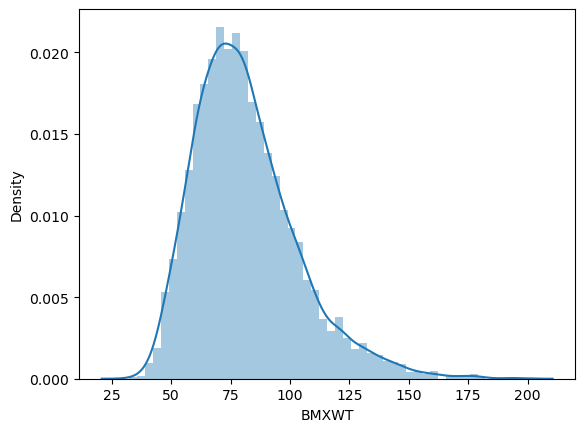

In [216]:
sns.distplot(df.BMXWT.dropna())

To compare several distributions, we can use side-by-side boxplots.  Below we compare the distributions of the first and second systolic blood pressure measurements ([BPXSY1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY1), BPXSY2), and the first and second diastolic blood pressure measurements ([BPXDI1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXDI1), BPXDI2). As expected, diastolic measurements are substantially lower than systolic measurements.  Above we saw that the second blood pressure reading on a subject tended on average to be slightly lower than the first measurement.  This difference was less than 1 mm/Hg, so is not visible in the "marginal" distributions shown below.

Text(0, 0.5, 'Blood pressure in mm/Hg')

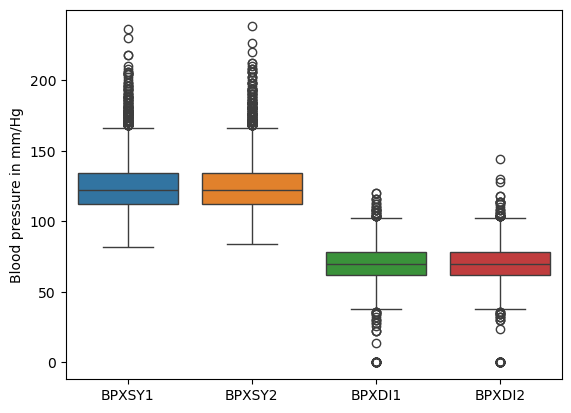

In [218]:
sns.boxplot(data = df.loc[:,["BPXSY1", "BPXSY2", "BPXDI1", "BPXDI2"]]).set_ylabel("Blood pressure in mm/Hg")

Next, we stratify the blood pressure data based on different age group and compare them across gender

<Axes: xlabel='agegrp', ylabel='BPXSY1'>

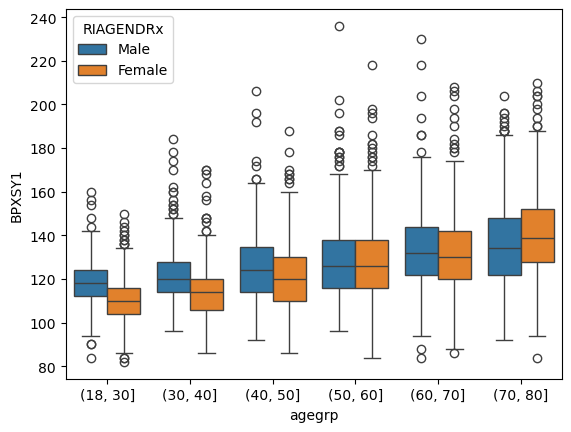

In [220]:
df["agegrp"] = pd.cut(df.RIDAGEYR,[18, 30, 40, 50, 60, 70, 80])
sns.boxplot(x = "agegrp", y = "BPXSY1", hue = "RIAGENDRx", data = df)

### Looks like, from 18 to 50 years of age, female systolic blood pressure tends to be lower than that of male. But, as age increases, the difference between male and female systolic blood pressure decreases.

Next, we stratify the educational status data into age groups

In [223]:
df.groupby("agegrp")["DMDEDUC2x"].value_counts()

/var/folders/ny/dmrzjwqj4d5bj8p_9s4p8sw40000gn/T/ipykernel_18022/1812301269.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("agegrp")["DMDEDUC2x"].value_counts()


agegrp    DMDEDUC2x      
(18, 30]  Some college/AA    364
          College            278
          HS/GED             237
          Missing            128
          9-11                99
          <9                  47
          Don't know           0
(30, 40]  Some college/AA    282
          College            264
          HS/GED             182
          9-11               111
          <9                  93
          Don't know           0
          Missing              0
(40, 50]  Some college/AA    262
          College            260
          HS/GED             171
          9-11               112
          <9                  98
          Don't know           0
          Missing              0
(50, 60]  Some college/AA    258
          College            220
          HS/GED             220
          9-11               122
          <9                 104
          Don't know           0
          Missing              0
(60, 70]  Some college/AA    238
          HS/GED 

In [224]:
dx = df.loc[~df.DMDEDUC2x.isin(["Don't know", "Missing"]),:] #remove the missing data from above
dx = dx.groupby(["agegrp","RIAGENDRx"])["DMDEDUC2x"]
dx = dx.value_counts()
dx = dx.unstack()
dx= dx.apply(lambda x: x/sum(x), axis = 1) #get the proportion
dx

/var/folders/ny/dmrzjwqj4d5bj8p_9s4p8sw40000gn/T/ipykernel_18022/2539506755.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dx = dx.groupby(["agegrp","RIAGENDRx"])["DMDEDUC2x"]


DMDEDUC2x               9-11        <9   College    HS/GED  Some college/AA
agegrp   RIAGENDRx                                                         
(18, 30] Female     0.079566  0.048825  0.282098  0.215190         0.374322
         Male       0.116525  0.042373  0.258475  0.250000         0.332627
(30, 40] Female     0.088608  0.097046  0.314346  0.164557         0.335443
         Male       0.150655  0.102620  0.251092  0.227074         0.268559
(40, 50] Female     0.109562  0.105578  0.298805  0.173307         0.312749
         Male       0.142145  0.112219  0.274314  0.209476         0.261845
(50, 60] Female     0.117021  0.102128  0.244681  0.234043         0.302128
         Male       0.147577  0.123348  0.231278  0.242291         0.255507
(60, 70] Female     0.117914  0.188209  0.195011  0.206349         0.292517
         Male       0.135011  0.151030  0.233410  0.231121         0.249428
(70, 80] Female     0.105134  0.224939  0.149144  0.239609         0.281174
         Male       0.112500  0.180000  0.237500  0.215000         0.255000

### Looks like college education rate is typically lower in the older population (50-80 years). Females tended to have less college education than males in all age group. The proportion of survey responders with less than 9 years of education is much lower in the young group (18-30) than the older group. Overall, this shows that education has been taken more seriously in modern times.


Next, we focus on the marital status data

In [227]:
# relabeling the variables for readability
df["DMDMARTLx"] = df.DMDMARTL.replace({1: "Married", 2: "Widowed", 3: "Divorced", 4: "Separated", 5: "NeverMarried", 6: "Cohabitating", 77: "Refused", 99: "Unknown"})
print("all subjects")

x = df["DMDMARTLx"].value_counts()
x = x/x.sum()
print(x)



all subjects
DMDMARTLx
Married         0.507855
NeverMarried    0.183412
Divorced        0.105773
Cohabitating    0.096273
Widowed         0.072342
Separated       0.033979
Refused         0.000365
Name: count, dtype: float64


Next, we construct a frequency table of these values for all people, then for women only and for men only. Then construct these three frequency tables using only people whose age is between 30 and 40.

In [229]:
for ky,db in df.groupby("RIAGENDRx"):
    print("\nGENDER = ", ky)
    x = db["DMDMARTLx"].value_counts()
    print(x/x.sum())


GENDER =  Female
DMDMARTLx
Married         0.457193
NeverMarried    0.182456
Divorced        0.122807
Widowed         0.103860
Cohabitating    0.091930
Separated       0.041404
Refused         0.000351
Name: count, dtype: float64

GENDER =  Male
DMDMARTLx
Married         0.562881
NeverMarried    0.184451
Cohabitating    0.100991
Divorced        0.087271
Widowed         0.038110
Separated       0.025915
Refused         0.000381
Name: count, dtype: float64


### Looks like, across all age groups in the survey, 
### married male proportion > married female proportion. 
### divorced male proportion > divorced male proportion
### Widowed male proportion < widowed female proportion

In [231]:
# next, we focus on the 30 to 40 age range
df3040 = df.query('RIDAGEYR >= 30 & RIDAGEYR<= 40')
for ky,db in df3040.groupby("RIAGENDRx"):
    print("\nGender = ", ky, ", between 30 to 40 years age")
    x = db["DMDMARTLx"].value_counts()
    print(x/x.sum())


Gender =  Female , between 30 to 40 years age
DMDMARTLx
Married         0.535714
NeverMarried    0.218045
Cohabitating    0.122180
Divorced        0.086466
Separated       0.033835
Widowed         0.003759
Name: count, dtype: float64

Gender =  Male , between 30 to 40 years age
DMDMARTLx
Married         0.556680
NeverMarried    0.204453
Cohabitating    0.157895
Divorced        0.048583
Separated       0.024291
Widowed         0.006073
Refused         0.002024
Name: count, dtype: float64


### between 30 to 40 years age, male and female group has similar proportion in most marital status. However, women tended to have higher divorce rate than men, also more widowed than men.

Next we look at other age groups.

In [234]:
df_female = df.query('RIAGENDRx == "Female"')
#print(df_female)


In [235]:
df.RIAGENDRx.value_counts()

RIAGENDRx
Female    2976
Male      2759
Name: count, dtype: int64

In [236]:
df_female.RIDAGEYR.describe()

count    2976.000000
mean       47.793011
std        18.299419
min        18.000000
25%        32.000000
50%        47.000000
75%        62.000000
max        80.000000
Name: RIDAGEYR, dtype: float64

In [237]:
df_female["agegrp"] = pd.cut(df_female.RIDAGEYR,[18, 20,30, 40, 50, 60, 70, 80])
#df_female.agegrp.value_counts()

/var/folders/ny/dmrzjwqj4d5bj8p_9s4p8sw40000gn/T/ipykernel_18022/1215244052.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_female["agegrp"] = pd.cut(df_female.RIDAGEYR,[18, 20,30, 40, 50, 60, 70, 80])


In [276]:
import math
dx = df_female.loc[~df_female.DMDMARTLx.isin(["Refused",np.nan]),:]
dx = dx.groupby("agegrp")["DMDMARTLx"]
dx = dx.value_counts()
#print(dx)
dx = dx.unstack()
#print(dx)
dx = dx.apply(lambda x: x/x.sum(), axis = 1)
print("Female")
dx

Female


/var/folders/ny/dmrzjwqj4d5bj8p_9s4p8sw40000gn/T/ipykernel_18022/3349587991.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dx = dx.groupby("agegrp")["DMDMARTLx"]


DMDMARTLx,Cohabitating,Divorced,Married,NeverMarried,Separated,Widowed
agegrp,,,,,,
"(18, 20]",0.205128,0.000000,0.025641,0.769231,0.000000,0.000000
"(20, 30]",0.206226,0.021401,0.305447,0.445525,0.021401,0.000000
"(30, 40]",0.120253,0.090717,0.544304,0.204641,0.035865,0.004219
"(40, 50]",0.073705,0.137450,0.573705,0.125498,0.065737,0.023904
"(50, 60]",0.068230,0.176972,0.547974,0.089552,0.057569,0.059701
"(60, 70]",0.043084,0.192744,0.480726,0.086168,0.049887,0.147392
"(70, 80]",0.007317,0.143902,0.317073,0.051220,0.019512,0.460976


In [239]:
df_male = df.query('RIAGENDRx == "Male"')
#df_male.head()

In [240]:
df_male["agegrp"] = pd.cut(df_male.RIDAGEYR,[18,20,30,40,50,60,70,80])
dx = df_male.groupby("agegrp")["DMDMARTLx"]
dx = dx.value_counts()
dx = dx.unstack()
dx = dx.apply(lambda x: x/x.sum(), axis = 1)
print("Male")
dx

Male


/var/folders/ny/dmrzjwqj4d5bj8p_9s4p8sw40000gn/T/ipykernel_18022/2780804100.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_male["agegrp"] = pd.cut(df_male.RIDAGEYR,[18,20,30,40,50,60,70,80])
/var/folders/ny/dmrzjwqj4d5bj8p_9s4p8sw40000gn/T/ipykernel_18022/2780804100.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dx = df_male.groupby("agegrp")["DMDMARTLx"]


DMDMARTLx,Cohabitating,Divorced,Married,NeverMarried,Refused,Separated,Widowed
agegrp,,,,,,,
"(18, 20]",0.075000,0.000000,0.025000,0.900000,0.000000,0.000000,0.000000
"(20, 30]",0.212963,0.004630,0.238426,0.523148,0.000000,0.016204,0.004630
"(30, 40]",0.157205,0.052402,0.563319,0.194323,0.002183,0.026201,0.004367
"(40, 50]",0.082294,0.084788,0.703242,0.097257,0.000000,0.027431,0.004988
"(50, 60]",0.074890,0.125551,0.651982,0.103524,0.000000,0.022026,0.022026
"(60, 70]",0.050343,0.125858,0.665904,0.086957,0.000000,0.032037,0.038902
"(70, 80]",0.022388,0.141791,0.611940,0.022388,0.000000,0.034826,0.166667


Next, we probe the relationship between leg length and arm length, stratifying first by gender, then by gender and ethnicity. 

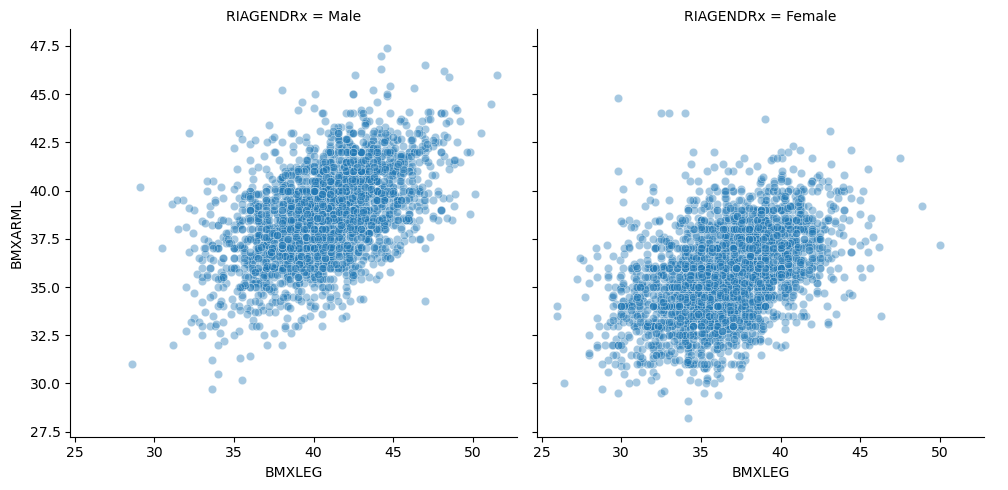

In [281]:
sns.FacetGrid(df, col = "RIAGENDRx", height = 5).map(sns.scatterplot,"BMXLEG","BMXARML", alpha = 0.4).add_legend()

### Looks like, men tend to have somewhat longer arms and legs than women -- this is reflected in the fact that the cloud of points in the above figure on the left is shifted slightly up and to the right relative to the cloud of points on the right. In addition, the correlation between arm length and leg length appears to be somewhat weaker in women than in men.

Next we look to stratifying the data by both gender and ethnicity. This results in 2 x 5 = 10 total strata, since there are 2 gender strata and 5 ethnicity strata. These scatterplots reveal differences in the means as well a diffrences in the degree of association (correlation) between different pairs of variables. 

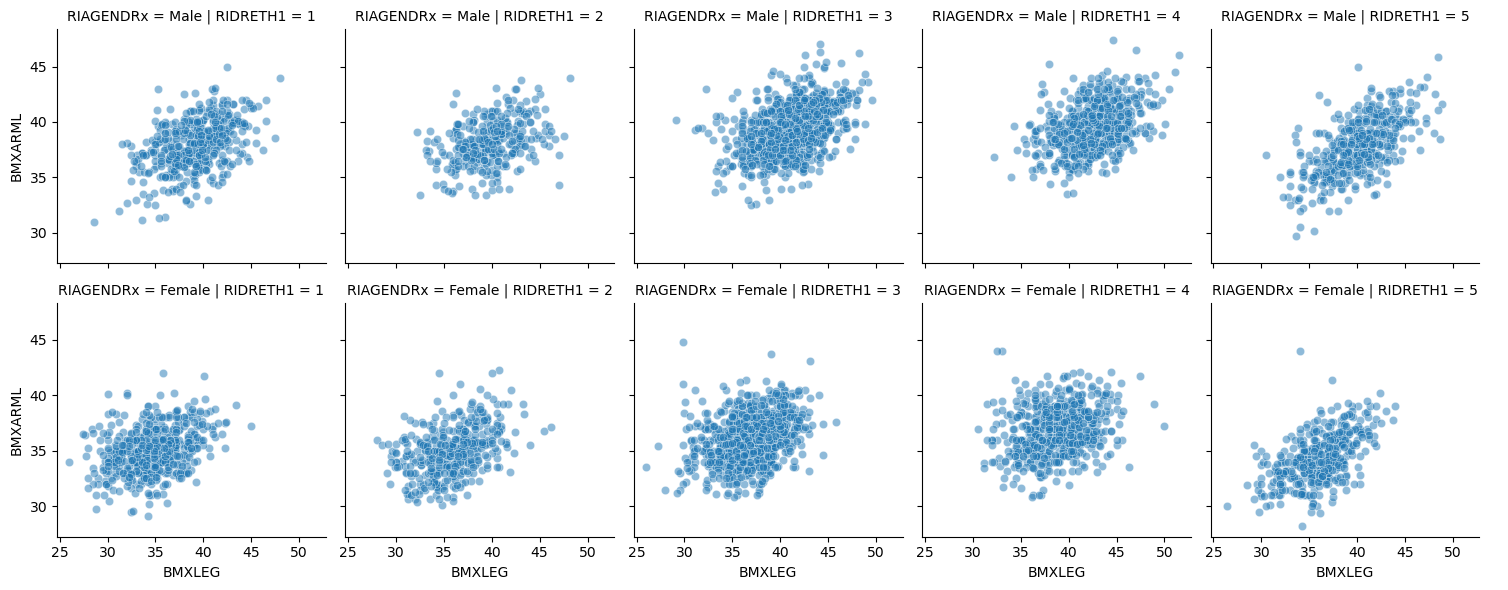

In [286]:
sns.FacetGrid(df, col = "RIDRETH1", row = "RIAGENDRx").map(sns.scatterplot, "BMXLEG","BMXARML",alpha = 0.5).add_legend()

### We see that although some ethnic groups tend to have longer/shorter arms and legs than others, the relationship between arm length and leg length within genders is roughly similar across the ethnic groups. One notable observation is that ethnic group 5, which consists of people who report being multi-racial or are of any race not treated as a separate group (due to small sample size), the correlation between arm length and leg length is stronger, especially for men.